In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
dataset = pd.read_csv('Raisin_Dataset.csv')


In [3]:
df = dataset.sample(frac=1)

In [4]:
df.isna().sum().sum()

0

In [5]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
450,137583,649.541485,273.260282,0.907201,142650,0.731638,1590.354,Besni
544,103666,456.382705,293.922435,0.765003,107992,0.647265,1332.203,Besni
408,82793,428.116905,249.390880,0.812809,84950,0.742458,1130.673,Kecimen
353,53121,350.968358,195.867445,0.829789,56120,0.732663,930.619,Kecimen
111,44367,322.504019,176.708973,0.836526,46531,0.733000,883.973,Kecimen


In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer


In [7]:
transformer = make_column_transformer((OneHotEncoder(), ['Class']),remainder='passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed,columns=transformer.get_feature_names_out())

In [8]:
df = transformed_df

In [9]:
df

,onehotencoder__Class_Besni,onehotencoder__Class_Kecimen,remainder__Area,remainder__MajorAxisLength,remainder__MinorAxisLength,remainder__Eccentricity,remainder__ConvexArea,remainder__Extent,remainder__Perimeter
0,1.0,0.0,137583.0,649.541485,273.260282,0.907201,142650.0,0.731638,1590.354
1,1.0,0.0,103666.0,456.382705,293.922435,0.765003,107992.0,0.647265,1332.203
2,0.0,1.0,82793.0,428.116905,249.390880,0.812809,84950.0,0.742458,1130.673
3,0.0,1.0,53121.0,350.968358,195.867445,0.829789,56120.0,0.732663,930.619
4,0.0,1.0,44367.0,322.504019,176.708973,0.836526,46531.0,0.733000,883.973
...,...,...,...,...,...,...,...,...,...
895,0.0,1.0,75314.0,392.651558,246.075672,0.779259,77118.0,0.704712,1073.768
896,0.0,1.0,54983.0,292.898907,248.408020,0.529834,58095.0,0.725274,921.613
897,1.0,0.0,106393.0,472.309406,287.593890,0.793239,109501.0,0.678388,1281.378
898,1.0,0.0,82853.0,430.114997,251.175700,0.811773,85292.0,0.746437,1139.840


In [10]:
X = df.iloc[:,[2,8]].values # Based on Area and Perimeter
Y = df.iloc[:, 0].values  # Bensi class resins
Z =  df.iloc[:, 1].values # Kecimen class resins

In [11]:
import seaborn as sns

<AxesSubplot: >

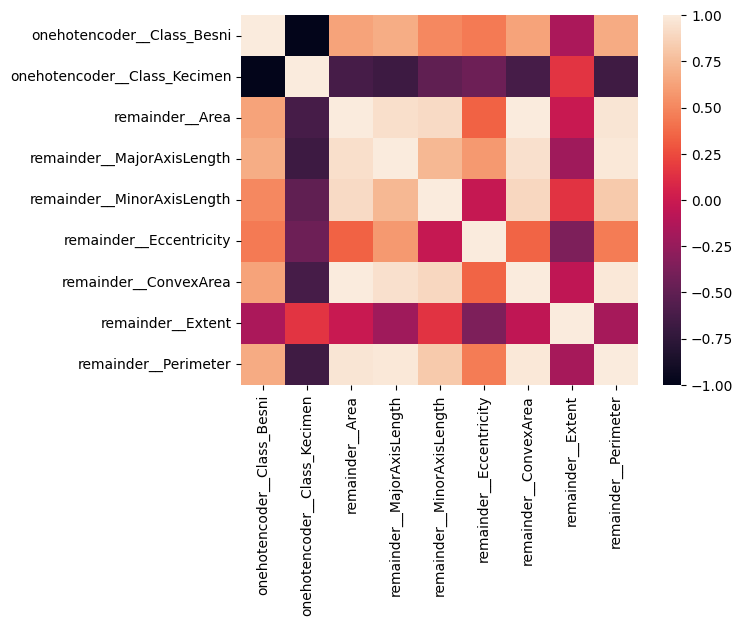

In [12]:
sns.heatmap(df.corr())

In [13]:
X[:10]


array([[137583.   ,   1590.354],
       [103666.   ,   1332.203],
       [ 82793.   ,   1130.673],
       [ 53121.   ,    930.619],
       [ 44367.   ,    883.973],
       [ 49336.   ,    909.681],
       [ 67404.   ,    997.276],
       [ 63452.   ,    945.523],
       [ 72653.   ,   1062.07 ],
       [145693.   ,   1595.364]])

In [14]:
Y[:20]

array([1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1.])

In [15]:
Z[:20]

array([0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0.])

In [16]:
X.shape

(900, 2)

In [17]:
Y.shape

(900,)

In [18]:
X.reshape(1,-1)

array([[137583.   ,   1590.354, 103666.   , ...,   1139.84 ,  53077.   ,
           934.708]])

In [19]:
X_mod = X.reshape(-1,1)

In [20]:
X_mod

array([[137583.   ],
       [  1590.354],
       [103666.   ],
       ...,
       [  1139.84 ],
       [ 53077.   ],
       [   934.708]])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [23]:
X_train, X_test, z_train, z_test = train_test_split(X, Z, test_size = 0.25, random_state = 0)

In [24]:
X_train[:10]

array([[ 76741.   ,   1056.74 ],
       [ 75368.   ,   1078.409],
       [ 87524.   ,   1184.04 ],
       [ 64380.   ,    981.544],
       [ 53758.   ,    965.068],
       [104352.   ,   1390.73 ],
       [ 90176.   ,   1136.669],
       [ 83248.   ,   1129.072],
       [ 53964.   ,    943.599],
       [ 99378.   ,   1260.343]])

In [25]:
mean = sum(X_train[:,0])/len(X_train[:,0])

In [26]:
mean

87389.63111111111

In [27]:
a = [(X_train[i][0] - mean)**2 for i in range(len(X_train))]

In [28]:
a


[113393344.54052351,
 144519614.57163462,
 18054.998301233907,
 529443123.8694125,
 1131086611.193857,
 287721958.3227456,
 7763851.584967888,
 17153108.260523476,
 1117272815.1760793,
 143720988.61607894,
 814111038.1227459,
 68618544.38496794,
 723576046.6205233,
 1091154718.1227458,
 1291800846.9271903,
 18942.32274567969,
 18702434.247190144,
 825966396.4027458,
 839340215.2960789,
 69466075.75830127,
 998726293.144968,
 92724745.19830118,
 84499645.7894123,
 834899707.0471903,
 385558009.13163465,
 83715749.46941239,
 21129017.57163459,
 2383454022.08719,
 9794590.891634583,
 1093534363.5627458,
 886707314.5894125,
 4503533174.92719,
 353952715.584968,
 666484902.60719,
 1208718638.8160791,
 1508439266.584968,
 424221213.12719023,
 480514068.3094125,
 159431813.2160791,
 528937032.984968,
 437829213.3983011,
 78985325.76719008,
 1117455846.5716343,
 578901351.0694122,
 295620950.78496796,
 6222901424.736078,
 5357269249.304968,
 687402867.1938567,
 383832009.5938569,
 99752775.211

In [29]:
var = 0 
for i in range(len(a)):
    var = var + a[i]

In [30]:
var = var / len(a)

In [31]:
import math
sd = math.sqrt(var)

In [32]:
sd

38964.51645502034

In [33]:
(52.0 - mean)/sd

-2.2414658016334292

In [34]:
X_train[:][4]

array([53758.   ,   965.068])

In [35]:
y_train[:10]

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1.])

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [37]:
X_train

array([[-0.27329047, -0.38888362],
       [-0.30852766, -0.30971585],
       [ 0.00344849,  0.07620743],
       ...,
       [-0.05732475, -0.08219389],
       [-0.59093845, -0.38465652],
       [ 2.27274395,  1.67925172]])

In [38]:
X_test

array([[ 2.57909986e+00,  2.54871783e+00],
       [ 3.81197922e-01,  4.06289188e-01],
       [ 2.13513095e-01,  2.56883659e-01],
       [-3.07796980e-01, -2.26503319e-01],
       [-1.20642355e+00, -1.36389780e+00],
       [-8.29752154e-03,  1.55414128e-01],
       [-7.36752201e-01, -8.33208159e-01],
       [-6.15270441e-01, -6.29851752e-01],
       [ 6.87440669e-01,  6.49223727e-01],
       [-9.87587164e-01, -1.01146168e+00],
       [-1.21257713e+00, -1.35279425e+00],
       [-1.27958850e-01,  1.80896134e-02],
       [-1.16206656e+00, -1.30039194e+00],
       [-1.32675152e+00, -1.51178039e+00],
       [-7.32931859e-01, -6.71908323e-01],
       [-9.66562461e-01, -8.93378928e-01],
       [ 4.33400721e-01,  7.43770471e-01],
       [ 2.81955067e+00,  1.88091601e+00],
       [-9.11513635e-01, -9.23724237e-01],
       [ 3.17713574e-01,  8.02216950e-01],
       [-1.48225740e+00, -1.66657844e+00],
       [ 1.66085878e+00,  1.49388426e+00],
       [-6.97061664e-01, -4.04390752e-01],
       [ 8.

In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
y_pred

array([1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0.])

In [42]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, z_train)

In [43]:
# z_pred = classifier.predict(X_test)

In [44]:
# z_pred

In [45]:
len(X_test)

225

In [46]:
from sklearn.metrics import confusion_matrix
cm_y = confusion_matrix(y_test, y_pred)

In [47]:
cm_y

array([[101,  13],
       [ 19,  92]], dtype=int64)

<AxesSubplot: >

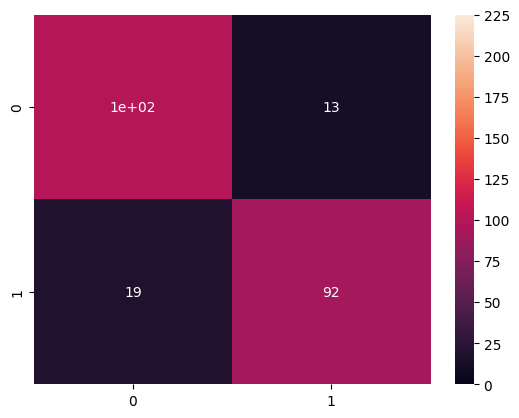

In [64]:
sns.heatmap(cm_y,annot=True,vmax=225,vmin=0)

In [49]:
df_prediction = pd.DataFrame(columns=['y_pred','y_test'])

In [50]:
df_prediction['y_pred'] = y_pred

In [51]:
df_prediction['y_test'] = y_test

In [74]:
len(df_prediction)

225

<AxesSubplot: >

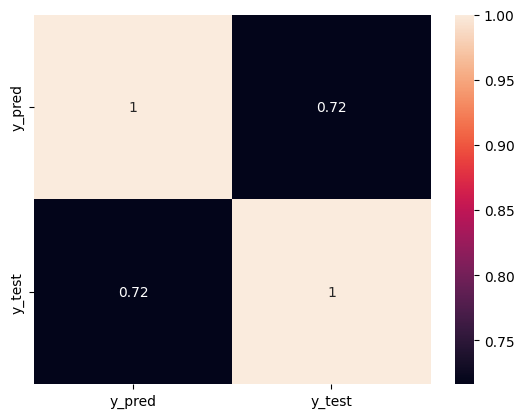

In [77]:
sns.heatmap(df_prediction.corr(),annot=True)

In [62]:
y_pred

array([1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0.])

In [63]:
y_test

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0.])

In [69]:
 1 - sum((y_test - y_pred)**2)/225


0.8577777777777778

In [53]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

In [54]:
import matplotlib.pyplot as plt

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


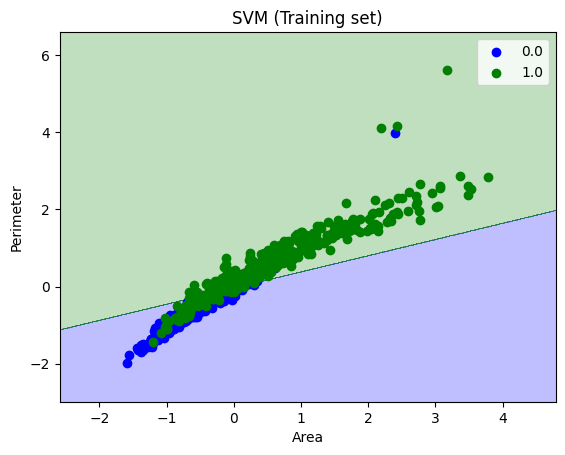

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


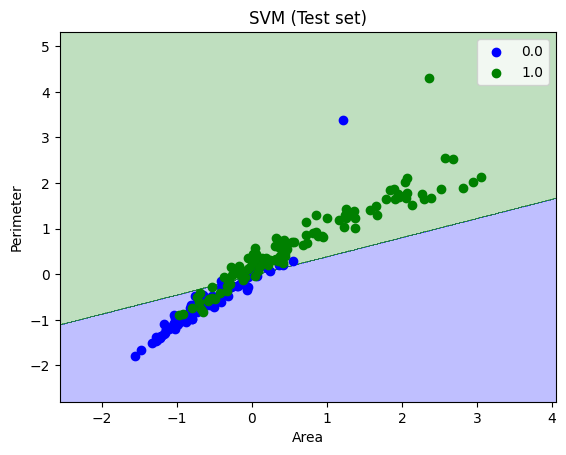

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()


In [57]:
z_train

array([1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [58]:
from sklearn.svm import SVC
classifier_Kecin = SVC(kernel = 'linear', random_state = 0)
classifier_Kecin.fit(X_train, z_train)

SVC(kernel='linear', random_state=0)

In [59]:
z_pred = classifier_Kecin.predict(X_test)
z_pred






array([0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1.])

In [60]:
cm_z = confusion_matrix(z_test, z_pred)
cm_z



array([[ 92,  19],
       [ 13, 101]], dtype=int64)